Video: https://www.youtube.com/watch?v=hKK59rfpXL0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=9

In [1]:
import spacy

In [2]:
nlp = spacy.blank("en")
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


In [3]:
nlp.pipe_names

[]

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x230bc00e5d0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x230bc14bef0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x230bc14ce40>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x230bd474110>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x230bd461c50>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x230bc14cc10>)]

In [7]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

### Part of Speech (.pos_) & Lemmatization (.lemma_)

In [8]:
for token in doc:
    print(token, " : ", token.pos_, " | ", token.lemma_) # token.pos_ (part of speech tagging) giving attribute
                                                         # token.lemma_ (Lemmatization) provide the "base word"

Captain  :  PROPN  |  Captain
america  :  PROPN  |  america
ate  :  VERB  |  eat
100  :  NUM  |  100
$  :  NUM  |  $
of  :  ADP  |  of
samosa  :  PROPN  |  samosa
.  :  PUNCT  |  .
Then  :  ADV  |  then
he  :  PRON  |  he
said  :  VERB  |  say
I  :  PRON  |  I
can  :  AUX  |  can
do  :  VERB  |  do
this  :  PRON  |  this
all  :  DET  |  all
day  :  NOUN  |  day
.  :  PUNCT  |  .


In [9]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
    print(ent.text, ' | ', ent.label_, ' | ', spacy.explain(ent.label_) )

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


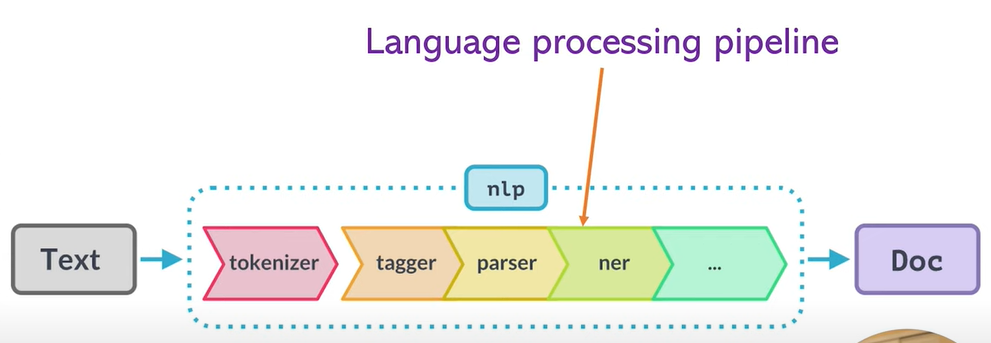

In [10]:
from spacy import displacy

displacy.render(doc, style='ent')

### From blank and adding "ner" into pipeline

In [12]:
source_nlp = spacy.load('en_core_web_sm')

nlp = spacy.blank("en")

nlp.add_pipe("ner",source = source_nlp)
nlp.pipe_names

['ner']

In [15]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")

for ent in doc.ents:
    print(ent.text, ' | ', ent.label_, ' | ', spacy.explain(ent.label_) )

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


### Excercise: 1

Get all the proper nouns from a given text in a list and also count how many of them.

Proper Noun means a noun that names a particular person, place, or thing.

In [29]:
nlp = spacy.load('en_core_web_sm')

text = '''Ravi and Raju are the best friends from school days.They wanted to go for a world tour and 
visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.
They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!
'''

# https://spacy.io/usage/linguistic-features

#creating the nlp object
doc = nlp(text)
propn = []

for token in doc:
    if token.pos_ == "PROPN":
        propn.append(token)
propn

[Raju, Paris, London, Dubai, Rome, Mohan, Hyderabad]

### Excercise: 2

Get all companies names from a given text and also the count of them.

Hint: Use the spacy ner functionality

In [36]:
text = '''The Top 5 companies in USA are Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''


doc = nlp(text)
ents = []

for ent in doc.ents:
    if ent.label_ == 'ORG':
        ents.append(ent)
ents

[Tesla,
 Walmart,
 Amazon,
 Microsoft,
 Google,
 Infosys,
 Reliance,
 HDFC Bank,
 Hindustan Unilever,
 Bharti]

In [38]:
len(ents)

10